In [82]:
# import glob
# import os
# import pandas as pd
# import json
# from collections import defaultdict

# # Initialize a dictionary to keep track of the number of files for each date
# folder_counts = defaultdict(int)

# # Find all JSON files
# for filepath in glob.glob('*/*/*.json'):
#     try:
#         # Extract the sports name, direction, and first 12 characters of the original filename from the file path
#         sports_name, direction, filename = filepath.split(os.sep)
#         filename_prefix = filename[4:12]
        
#         folder_name = f"{sports_name}_{direction}"
#         folder_counts[folder_name] += 1
#         index = folder_counts[folder_name]

#         with open(filepath, 'r') as file:
#             data = [json.loads(line.strip()) for line in file]
#         df = pd.DataFrame(data)

#         # Drop rows with missing 'T' values and sort the DataFrame by 'T'
#         df = df.dropna(subset=['T']).sort_values('T').reset_index(drop=True)

#         # Remove 'FILE TYPE' and 'FORMAT VERSION' columns, and move 'Frame' column to the first position
#         df = df.drop(['FILE TYPE', 'FORMAT VERSION'], axis=1)
#         df.index = [f'Frame{i+1}' for i in range(len(df))]

#         output_dir = os.path.join('csv_files', sports_name, direction)
#         os.makedirs(output_dir, exist_ok=True)
        
#         if len(df) > 200:
            
#             chunks = len(df) // 100

#             for i in range(chunks):
#                 savefile = filename_prefix
#                 savefile = f'{savefile}_{index}'
#                 index += 1
#                 output_filename = f'{sports_name}_{direction}_{savefile}.csv'
                
#                 chunk = df.iloc[i*100:(i+1)*100]
#                 chunk.to_csv(os.path.join(output_dir, output_filename), index=False)

#             folder_counts[folder_name] += i
#         else:
#             savefile = f'{filename_prefix}_{index}'
            
#             output_filename = f'{sports_name}_{direction}_{savefile}.csv'
#             df.to_csv(os.path.join(output_dir, output_filename), index=False)
    
#     except json.JSONDecodeError:
#         print(f'Error decoding JSON for file: {filepath}')


In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv('csv_files/golf/front/golf_front_20230711_1.csv')
xyz_str = df['C']            # Array of Point location (X position, Y position, Z position)
velocity_str = df['V']       # Array of Point velocity
power_str = df['P']          # Array of Point power
Track_ID_str = df['TID']     # Array of track IDs assigned to Point (255 for an invalid track.)
Track_Info_str = df['TRK']   # Array of track information (Track ID, status (0: standing, 1: lying down, 2: sitting, 3: falling, 4: unknown), X position, Y position)



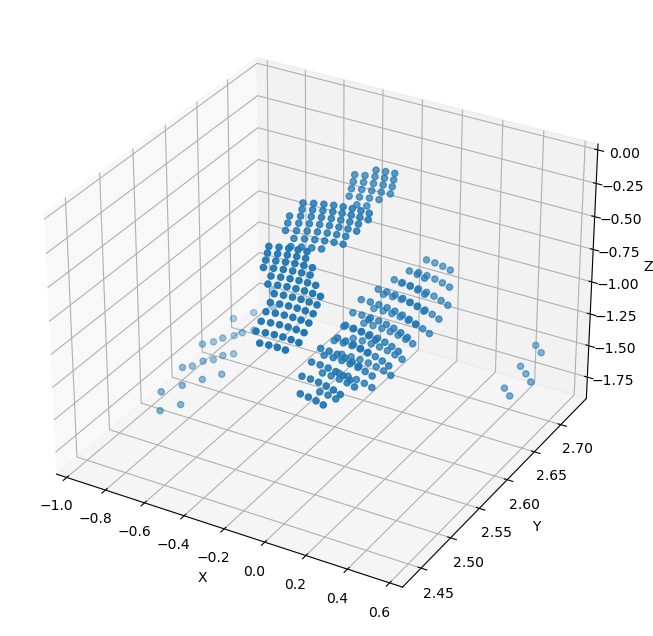

In [159]:
xyz_str_one_frame = xyz_str[0]

# Remove square brackets and split by comma
xyz_list = xyz_str_one_frame.replace("[", "").replace("]", "").split(", ")

# Convert to numpy array and reshape into 3 columns (x, y, z)
data_np = np.array(xyz_list, dtype=float).reshape(-1, 3)

xyz_data = pd.DataFrame(data_np)
xyz_data.columns = ['x', 'y', 'z']


fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xyz_data['x'], xyz_data['y'], xyz_data['z'])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

In [169]:
import matplotlib.animation as animation

# 전체 프레임의 수
num_frames = len(xyz_str)

def init():
    return ax.scatter([], [], []),  # scatter가 반환하는 객체를 반환

def animate(i):
    ax.clear()
    xyz_list = xyz_str[i].replace("[", "").replace("]", "").split(", ")
    data_np = np.array(xyz_list, dtype=float).reshape(-1, 3)
    xyz_data = pd.DataFrame(data_np)
    xyz_data.columns = ['x', 'y', 'z']
    scat = ax.scatter(xyz_data['x'], xyz_data['y'], xyz_data['z'])
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    return scat,  # scatter가 반환하는 객체를 반환


# 애니메이션 객체 생성
ani = animation.FuncAnimation(fig, animate, init_func=init, frames=num_frames, blit=False)
ani.save('animation.mp4', writer='ffmpeg')